In [0]:
# Imports
import tensorflow
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.optimizers import SGD, Adam
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

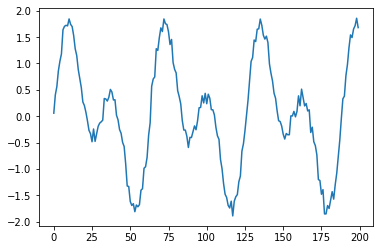

In [0]:
# Create series
series = np.sin(0.1*np.arange(200)) + np.sin(0.2*np.arange(200)) + np.random.randn(200) * 0.1

plt.plot(series)

In [0]:
# Build the dataset
T = 10 # Window size
X = []
Y = []
# Populate arrays
for t in range(len(series) - T):
    x = series[t:t+T]
    X.append(x)
    y = series[t+T]
    Y.append(y)

# Convert to np arrays
X = np.array(X).reshape(-1, T)
Y = np.array(Y)
N = len(X)
print("X shape: ", X.shape, " | Y shape:", Y.shape)

X shape:  (190, 10)  | Y shape: (190,)


In [0]:
# Create the model (linear regression)
i = Input(shape=(T,))
x = Dense(1)(i)

model = Model(i, x)

model.compile(loss="mse", optimizer=Adam(lr=0.1))

print(model.summary())

Model: "model_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 11        
Total params: 11
Trainable params: 11
Non-trainable params: 0
_________________________________________________________________
None


In [0]:
# Train the model
r = model.fit(
    X[:-N//2], Y[:-N//2],
    epochs=80,
    validation_data=(X[-N//2:], Y[-N//2:]), 
    verbose=0)

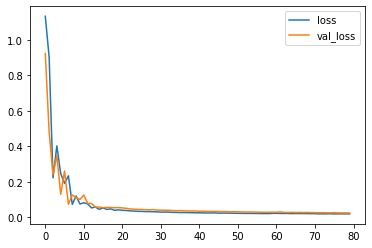

In [0]:
# Plot the loss over time
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()

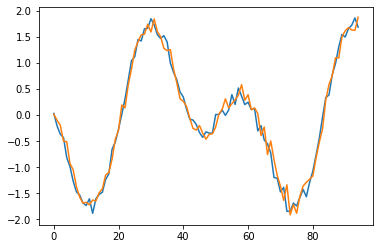

In [0]:
# Create some predictions (wrong way)
validation_target = Y[-N//2:]
validation_predictions = []

# Index of first val input
i = -N//2

while(len(validation_predictions) < len(validation_target)):
    p = model.predict(X[i].reshape(1, -1))[0, 0] # array -> scalar
    i += 1

    validation_predictions.append(p)

# Plot the predictions and the true values
plt.plot(validation_target, label="target")
plt.plot(validation_predictions, label="prediction")

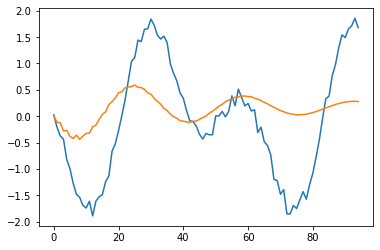

In [0]:
# Create some predictions (right way)
validation_target = Y[-N//2:]
validation_predictions = []

# last train input
last_x = X[-N//2]

# This time use the predictions as inputs for the next predictions (shows true accuracy)
while(len(validation_predictions) < len(validation_target)):
    p = model.predict(last_x.reshape(1, -1))[0][0] # array -> scalar

    validation_predictions.append(p)

    # Make a new input
    last_x = np.roll(last_x, -1)
    last_x[-1] = p

# Plot the predictions and the true values
plt.plot(validation_target, label="target")
plt.plot(validation_predictions, label="prediction")